<center>

<div align="center">
    <img src="../Images/javeriana.PNG" width="800" height="600">
</div>

**Juan David Villate Lemus**

**José Rafael Peña Gutiérrez**

**Laura Katherine Moreno Giraldo**

**William Ricardo Fernández Garnica**

## Song Embeddings - Skipgram Recommender

In this notebook, we'll use human-made music playlists to learn song embeddings. We'll treat a playlist as if it's a sentence and the songs it contains as words. We feed that to the word2vec algorithm which then learns embeddings for every song we have. These embeddings can then be used to recommend similar songs. This technique is used by Spotify, AirBnB, Alibaba, and others. It accounts for a vast portion of their user activity, user media consumption, and/or sales (in the case of Alibaba).

The [dataset we'll use](https://www.cs.cornell.edu/~shuochen/lme/data_page.html) was collected by Shuo Chen from Cornell University. The dataset contains playlists from hundreds of radio stations from around the US.

## Importing packages and dataset

In [ ]:
import numpy as np
import pandas as pd
import gensim
from gensim.models import Word2Vec
from urllib import request
import warnings
warnings.filterwarnings('ignore')

The playlist dataset is a text file where every line represents a playlist. That playlist is basically a series of song IDs.

In [ ]:
# Get the playlist dataset file
data = request.urlopen('https://storage.googleapis.com/maps-premium/dataset/yes_complete/train.txt')

# Parse the playlist dataset file. Skip the first two lines as
# they only contain metadata
lines = data.read().decode("utf-8").split('\n')[2:]

# Remove playlists with only one song
playlists = [s.rstrip().split() for s in lines if len(s.split()) > 1]


The `playlists` variable now contains a python list. Each item in this list is a playlist containing song ids. We can look at the first two playlists here:

In [ ]:
print( 'Playlist #1:\n ', playlists[0], '\n')
print( 'Playlist #2:\n ', playlists[1])

Playlist #1:
  ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '2', '42', '43', '44', '45', '46', '47', '48', '20', '49', '8', '50', '51', '52', '53', '54', '55', '56', '57', '25', '58', '59', '60', '61', '62', '3', '63', '64', '65', '66', '46', '47', '67', '2', '48', '68', '69', '70', '57', '50', '71', '72', '53', '73', '25', '74', '59', '20', '46', '75', '76', '77', '59', '20', '43'] 

Playlist #2:
  ['78', '79', '80', '3', '62', '81', '14', '82', '48', '83', '84', '17', '85', '86', '87', '88', '74', '89', '90', '91', '4', '73', '62', '92', '17', '53', '59', '93', '94', '51', '50', '27', '95', '48', '96', '97', '98', '99', '100', '57', '101', '102', '25', '103', '3', '104', '105', '106', '107', '47', '108', '109', '110', '111', '112', '113', '25', '63', '62', '114', '115', '84', '116', '117',

## Training the Word2Vec Model
Our dataset is now in the shape the the Word2Vec model expects as input. We pass the dataset to the model.

In [ ]:
model = Word2Vec(playlists, vector_size=32, window=20, negative=50, min_count=1, workers=4)

The model is now trained. Every song has an embedding. We only have song IDs, though, no titles or other info. Let's grab the song information file.

## Song Title and Artist File
Let's load and parse the file containing song titles and artists

In [ ]:
songs_file = request.urlopen('https://storage.googleapis.com/maps-premium/dataset/yes_complete/song_hash.txt')
songs_file = songs_file.read().decode("utf-8").split('\n')
songs = [s.rstrip().split('\t') for s in songs_file]

In [14]:
songs_df = pd.DataFrame(data=songs, columns = ['id', 'title', 'artist'])
songs_df = songs_df.set_index('id')

In [15]:
songs_df.head()

,title,artist
id,,
0,Gucci Time (w\/ Swizz Beatz),Gucci Mane
1,Aston Martin Music (w\/ Drake & Chrisette Mich...,Rick Ross
2,Get Back Up (w\/ Chris Brown),T.I.
3,Hot Toddy (w\/ Jay-Z & Ester Dean),Usher
4,Whip My Hair,Willow


In [27]:
def print_recommendations(song_id):
    print( songs_df.iloc[song_id] )
    similar_songs = np.array(model.wv.most_similar(positive=str(song_id)))[:,0]
    return  songs_df.iloc[similar_songs]

In [18]:
print_recommendations(842)

title     California Love (w\/ Dr. Dre & Roger Troutman)
artist                                              2Pac
Name: 842 , dtype: object


,title,artist
id,,
5668,How We Do (w\/ 50 Cent),The Game
330,Hate It Or Love It (w\/ 50 Cent),The Game
413,If I Ruled The World (Imagine That) (w\/ Laury...,Nas
27078,Out Of My Head (w\/ Trey Songz),Lupe Fiasco
5788,Drop It Like It's Hot (w\/ Pharrell),Snoop Dogg
1560,In Da Club,50 Cent
27114,Blow The Whistle,Too Short
893,Whatever You Like,T.I.
6741,Love In This Club (w\/ Young Jeezy),Usher


### Exercise:

Build visualization for the embeddings of the song recommender.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [ ]:
# Get the song embeddings from the Word2Vec model
embeddings = model.wv.vectors

Este código realiza la reducción de dimensionalidad de un conjunto de datos de embeddings (representaciones vectoriales de alta dimensión) a dos dimensiones utilizando el algoritmo t-SNE (t-distributed Stochastic Neighbor Embedding). Es útil para visualizar datos de alta dimensión en un espacio bidimensional.

1. Inicializa el algoritmo t-SNE: Se crea una instancia del algoritmo t-SNE especificando tres parámetros:

    - n_components=2: El número de dimensiones finales a las que se quiere reducir los datos, en este caso, 2 para facilitar la visualización en un plano bidimensional.
    - perplexity=30: Un parámetro que indica el balance entre la atención a los datos locales y globales, ayudando a determinar cuántos vecinos cercanos se considerarán para cada punto. Un valor medio como 30 suele funcionar bien en muchas situaciones, pero puede necesitar ajuste dependiendo de la naturaleza del dataset.
    - random_state=42: Un valor fijo para el generador de números aleatorios que asegura la reproducibilidad de los resultados.

2. Aplica t-SNE a los embeddings: La función fit_transform(embeddings) aplica el algoritmo t-SNE al conjunto de datos de embeddings, transformándolos de un espacio de alta dimensión a un espacio de dos dimensiones. El resultado, embeddings_tsne, es un nuevo conjunto de datos donde cada punto (embedding original) tiene ahora una representación en dos dimensiones, manteniendo tanto como sea posible las relaciones de proximidad del espacio original.

In [ ]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
embeddings_tsne = tsne.fit_transform(embeddings)

In [38]:
song_id = [3822, 842]

In [41]:
import gensim
import gensim.downloader as api
import matplotlib.pyplot as plt #to generate the t-SNE plot
from sklearn.manifold import TSNE #scikit learn's TSNE
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


1. Extracción del vocabulario del modelo: words_vocab = list(model.wv.key_to_index) extrae todas las palabras presentes en el vocabulario del modelo y las almacena en una lista llamada words_vocab. Cada palabra en el vocabulario tiene un índice asociado que se usa internamente en el modelo para representarla.

2. Impresión de información básica del vocabulario:

    - print("Size of Vocabulary:", len(words_vocab)) imprime el tamaño total del vocabulario, es decir, el número total de palabras únicas que el modelo puede reconocer y procesar.
    - print("Few words in Vocabulary", words_vocab[:50]) imprime las primeras 50 palabras del vocabulario para dar una idea de qué tipo de palabras contiene.

3. Eliminación de palabras vacías (stop words):

    - stopwords_en = stopwords.words() obtiene una lista de palabras vacías (stop words) para el idioma inglés. Las palabras vacías son palabras comunes que usualmente se consideran irrelevantes para ciertos procesos de análisis de texto y NLP (Natural Language Processing), como "the", "is", "in", etc.
    - words_vocab_without_sw = [word.lower() for word in words_vocab if not word in stopwords_en] crea una nueva lista de palabras del vocabulario (words_vocab_without_sw) excluyendo las palabras vacías. Esto se hace para limpiar el vocabulario antes de la visualización, eliminando palabras que podrían considerarse ruido y no aportar significado relevante. La conversión de palabras a minúsculas (word.lower()) asegura que la comparación con la lista de palabras vacías sea insensible a mayúsculas, lo cual es importante ya que las listas de palabras vacías suelen estar en minúsculas.

In [42]:
#Preprocessing our models vocabulary to make better visualizations

words_vocab= list(model.wv.key_to_index)#all the words in the vocabulary.
print("Size of Vocabulary:",len(words_vocab))
print("Few words in Vocabulary",words_vocab[:50])

#Let us remove the stop words from this it will help making the visualization cleaner
stopwords_en = stopwords.words()
words_vocab_without_sw = [word.lower() for word in words_vocab if not word in stopwords_en]

Size of Vocabulary: 75261
Few words in Vocabulary ['20065', '5', '46', '7233', '20627', '19477', '20068', '60', '82', '9659', '292', '6', '20055', '344', '1', '14', '475', '27076', '90', '1813', '20064', '6471', '13', '7261', '19781', '2378', '50', '2373', '7303', '20054', '2198', '6488', '77', '70', '1795', '2375', '19783', '9752', '288', '19782', '7255', '2251', '20047', '25', '18440', '2185', '19778', '242', '2218', '85']


1. Creación de listas temporales para almacenar embeddings y palabras similares:

    - Dentro del bucle, se inicializan dos listas vacías, embeddings = [] y words = [], para almacenar temporalmente los embeddings y las palabras similares para cada palabra clave.

2. Búsqueda de palabras similares y sus embeddings:

    - El bucle interno for similar_word, _ in model.wv.most_similar(word, topn=30): recupera las 30 palabras más similares a la palabra clave actual (indicada por word) junto con su similitud (aunque la similitud se ignora con _).
    - words.append(similar_word) agrega cada palabra similar encontrada a la lista words.
    - embeddings.append(model.wv[similar_word]) agrega el embedding correspondiente a cada palabra similar a la lista embeddings.

3. Agregación de los clusters:

    - embedding_clusters.append(embeddings) agrega la lista de embeddings de palabras similares al cluster de embeddings.
    - word_clusters.append(words) agrega la lista de palabras similares al cluster de palabras.

In [48]:
keys = ['3822', '842','19563']
embedding_clusters = []
word_clusters = []

for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.wv.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model.wv[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [49]:
print("Embedding clusters:",embedding_clusters[0][0])#Access vector of the first word only
print("Word Clousters:",word_clusters[:2])

Embedding clusters: [-1.5052762  -1.2422189   0.58515495  0.05755059  0.70736426 -0.7847042
  0.601645   -0.6244948  -1.7146865   0.15330718  0.13983117  0.5783815
  2.051237    0.2283193  -0.5550683  -0.12497713  0.90856755  0.21732375
 -0.1454964   0.83292997  0.27518898  1.4841446  -0.6183579   0.2246568
 -0.97790277 -0.74649686  1.2077516  -0.5789578   0.7018474   0.28442878
  1.2694767   0.81488895]
Word Clousters: [['4187', '4157', '4181', '1506', '15660', '4009', '3358', '500', '4271', '3942', '3415', '4288', '12749', '3357', '4018', '8542', '4013', '3384', '3396', '4169', '3907', '4005', '3501', '3791', '3520', '3660', '3493', '3704', '3880', '3859'], ['5668', '330', '413', '27078', '5788', '1560', '27114', '893', '6741', '5810', '5880', '5681', '234', '329', '331', '211', '18844', '23900', '12205', '25871', '485', '394', '11838', '12479', '886', '453', '890', '12288', '5828', '5803']]


1. Preparación de los datos:

    - embedding_clusters = np.array(embedding_clusters) convierte embedding_clusters, una lista de listas de embeddings, en un array de NumPy para facilitar su manipulación y operaciones matemáticas.
    - n, m, k = embedding_clusters.shape extrae las dimensiones del array embedding_clusters, donde n es el número de clusters, m es el número de embeddings en cada cluster, y k es la dimensión de cada embedding.

2. Configuración del modelo t-SNE:

- Se crea una instancia de TSNE con varios parámetros configurados:

    - perplexity=5 establece la perplejidad del algoritmo, un parámetro relacionado con el número de vecinos cercanos que se consideran para cada punto.
    - n_components=2 especifica que el espacio objetivo tiene dos dimensiones.
    - init='pca' indica que la inicialización se realiza utilizando el resultado de una PCA (Análisis de Componentes Principales), lo cual puede ayudar en la convergencia.
    - n_iter=1500 establece el número de iteraciones para la optimización.
    - random_state=2020 asegura la reproducibilidad de los resultados al fijar la semilla del generador de números aleatorios.

3. Transformación de los datos:

- embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2) transforma los embeddings de alta dimensión a un espacio de dos dimensiones.
    - Primero, embedding_clusters.reshape(n * m, k) convierte el array tridimensional de embeddings en un array bidimensional, donde cada fila es un embedding. Esta operación es necesaria porque t-SNE trabaja con datos en formato de lista de puntos (o filas en un array bidimensional).
    - Luego, tsne_model_en_2d.fit_transform(...) aplica t-SNE a estos datos, resultando en un array bidimensional donde cada embedding de alta dimensión se ha mapeado a un punto en dos dimensiones.
    - Finalmente, .reshape(n, m, 2) reorganiza el resultado de vuelta a un formato tridimensional, preservando la estructura original de clusters (n clusters, cada uno con m puntos, ahora cada punto representado en 2 dimensiones).

In [50]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape #geting the dimensions
tsne_model_en_2d = TSNE(perplexity=5, n_components=2, init='pca', n_iter=1500, random_state=2020)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2) #reshaping it into 2d so we can visualize it

1. Definición de la función tsne_plot_similar_words:

- labels, embedding_clusters, y word_clusters son los argumentos de la función, donde labels son las etiquetas para cada cluster (en este caso, palabras clave sin stopwords), embedding_clusters contiene los embeddings de palabras en dos dimensiones después de aplicar t-SNE, y word_clusters contiene las palabras agrupadas en clusters.
- plt.figure(figsize=(16, 9)) inicia una nueva figura con un tamaño específico.
- Dentro de un bucle, para cada cluster, se extraen las coordenadas x e y de los embeddings y se utilizan para crear un scatter plot con plt.scatter(x, y, alpha=a, label=label). La transparencia de los puntos se controla con alpha=a.
- Para cada palabra en el cluster, se añade una anotación en el gráfico con plt.annotate(word, ...), colocando el texto cerca de su punto correspondiente.
- plt.legend(loc=4) muestra la leyenda del gráfico en la posición especificada.
- plt.grid(True) habilita la cuadrícula del gráfico para facilitar la lectura.
- plt.show() muestra el gráfico resultante.

2. Uso de la función para visualizar los clusters:

    La función tsne_plot_similar_words se llama con los argumentos words_vocab_without_sw, embeddings_en_2d, y word_clusters. Esto genera un gráfico donde cada cluster de palabras similares está visualmente agrupado y etiquetado, permitiendo observar cómo el modelo de embeddings agrupa las palabras según su similitud semántica.

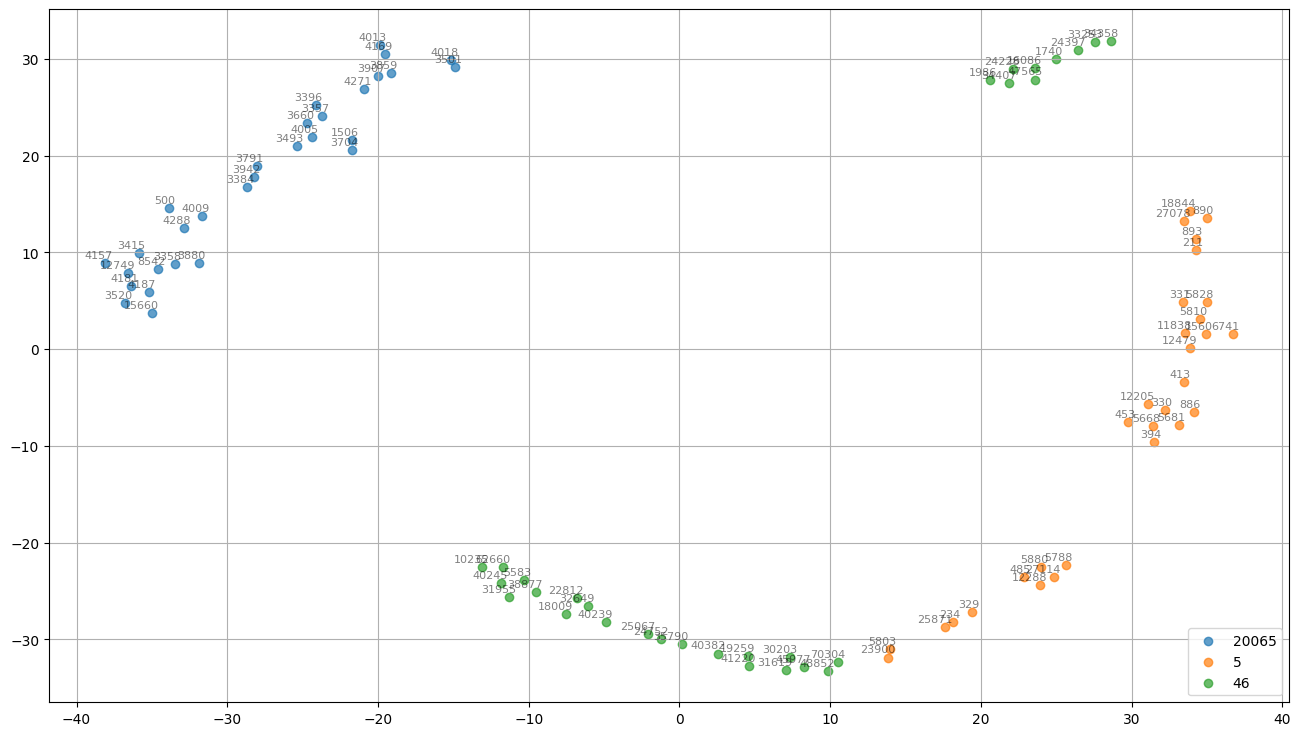

In [51]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline

#script for constructing two-dimensional graphics using Matplotlib
def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a=0.7):
    plt.figure(figsize=(16, 9))


    for label, embeddings, words in zip(labels, embedding_clusters, word_clusters):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.grid(True)
    plt.show()

tsne_plot_similar_words(words_vocab_without_sw, embeddings_en_2d, word_clusters)